# Experiment 1
## Demonstration of different Preprocessing techniques including missing value handling and data discretization on election tweets dataset.

In [1]:
# Importing Required Libraries
import pandas as pd

In [ ]:
# Importing CSV file
df= pd.read_csv("/content/UPELECTIONS.csv")
# Printing Dataframe
print("Dataframe is:\n ")
df

Dataframe is:
 


,Unnamed: 0,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,0,Mate_Ebong,NaN,Travel lover. Entrepreneur. Soccer advocate.i ...,False,2022-02-11 07:31:24+00:00,RT @yoda_xyz: The high-stakes battle for Uttar...,NaN,Twitter for Android
1,1,Sameera Khan,India,Indep Journo. Writer. Researcher. Teacher. Rea...,False,2022-02-11 07:29:03+00:00,#UPElection - important context https://t.co/T...,['UPElection'],Twitter for Android
2,2,seemaverma,India,Ex Navy,False,2022-02-11 07:23:58+00:00,"RT @pencilashan: Yogi says vote for BJP in UP,...",NaN,Twitter for Android
3,3,Lucifer,riyadh saudi arabia,NaN,False,2022-02-11 07:23:07+00:00,RT @RubinaAfaqueIND: SP leader Vipin Manothia ...,NaN,Twitter for Android
4,4,shabbir,NaN,NaN,False,2022-02-11 07:02:24+00:00,RT @RubinaAfaqueIND: SP leader Vipin Manothia ...,NaN,Twitter for Android
...,...,...,...,...,...,...,...,...,...
3430,3430,Tanvi Patel,"Chandigarh, India",political science student.,False,2022-02-03 01:41:06+00:00,@sambitswaraj @narendramodi Kindly utilise you...,NaN,Twitter for Android
3431,3431,INC akhter,"Rajasthan, India","State coordinator @INCMinority,\n&\nA #Congres...",False,2022-02-03 01:40:22+00:00,@sambitswaraj @narendramodi Kindly utilise you...,NaN,Twitter for Android
3432,3432,Ganesh Chand Rajwar,"Khatima,US Nagar ( UK ) India.",NaN,False,2022-02-03 01:05:45+00:00,@sambitswaraj @narendramodi Kindly utilise you...,['AajKiBaat'],Twitter for Android
3433,3433,Raji Loganathan- Always for INC,NaN,"Striving for Social Equality, teacher, Always ...",False,2022-02-03 00:33:30+00:00,@sambitswaraj @narendramodi Kindly utilise you...,"['UPElection', 'Budget2022']",Twitter for Android


In [ ]:
# Printing Columns in Dataframe
print("Dataframe Columns are:\n")
df.columns

Dataframe Columns are:



Index(['Unnamed: 0', 'user_name', 'user_location', 'user_description',
       'user_verified', 'date', 'text', 'hashtags', 'source'],
      dtype='object')

In [ ]:
# Checking for Null Values
print("Null Values in Dataframe are:\n ")
df.isnull()

Null Values in Dataframe are:
 


,Unnamed: 0,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,False
4,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
3430,False,False,False,False,False,False,False,True,False
3431,False,False,False,False,False,False,False,True,False
3432,False,False,False,True,False,False,False,False,False
3433,False,False,True,False,False,False,False,False,False


In [ ]:
# Printing for Null Value count according to columns
print("Null Value Count according to columns in Dataframe is:\n ")
df.isnull().sum()

Null Value Count according to columns in Dataframe is:
 


Unnamed: 0             0
user_name              0
user_location       1255
user_description     629
user_verified          0
date                   0
text                   0
hashtags            1516
source                 0
dtype: int64

### If the number of rows containing na values is less we can directly drop them using `df.dropna(axis=0)` function axis 0 for rows and axis  for column in dataframe
### Here the number of such rows are very big or a lot of rows contain these kind of values so instead of removing them we instead replace the values

In [ ]:
# Since this dataset is for UP which is in india we can update the missing nationality as Indian
# Inplace is True meaning the original dataset will be updated
df['user_location'].fillna("Indian",inplace = True)

# Since this dataset is for UP Election we can update the missing hashtags as UP Election
df['hashtags'].fillna("UP Election",inplace = True)

# Since this dataset is for UP we can update the missing User description as User Description
df['user_description'].fillna("Random User Description",inplace = True)

### Now the next target is Cleaning the data
### Since the text contains RT and @ symbol and also username we need to remove that

In [ ]:
# Replacing RT @ from data
# Since str.replace does not have inplace argument we can reinitialize dataframe column text
# Removing RT @ and username from data
df['text'] = df['text'].str.replace(r'^RT @\w+: ', '')
# Printing updated dataframe
print("After Replacing RT @ and Username from data:\n")
df

After Replacing RT @ and Username from data:



<ipython-input-27-1b1582780b3e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'^RT @\w+: ', '')


,Unnamed: 0,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,0,Mate_Ebong,NaN,Travel lover. Entrepreneur. Soccer advocate.i ...,False,2022-02-11 07:31:24+00:00,The high-stakes battle for Uttar Pradesh kicke...,NaN,Twitter for Android
1,1,Sameera Khan,India,Indep Journo. Writer. Researcher. Teacher. Rea...,False,2022-02-11 07:29:03+00:00,#UPElection - important context https://t.co/T...,['UPElection'],Twitter for Android
2,2,seemaverma,India,Ex Navy,False,2022-02-11 07:23:58+00:00,"Yogi says vote for BJP in UP, otherwise it wou...",NaN,Twitter for Android
3,3,Lucifer,riyadh saudi arabia,NaN,False,2022-02-11 07:23:07+00:00,SP leader Vipin Manothia was beaten up by BJP ...,NaN,Twitter for Android
4,4,shabbir,NaN,NaN,False,2022-02-11 07:02:24+00:00,SP leader Vipin Manothia was beaten up by BJP ...,NaN,Twitter for Android
...,...,...,...,...,...,...,...,...,...
3430,3430,Tanvi Patel,"Chandigarh, India",political science student.,False,2022-02-03 01:41:06+00:00,@sambitswaraj @narendramodi Kindly utilise you...,NaN,Twitter for Android
3431,3431,INC akhter,"Rajasthan, India","State coordinator @INCMinority,\n&\nA #Congres...",False,2022-02-03 01:40:22+00:00,@sambitswaraj @narendramodi Kindly utilise you...,NaN,Twitter for Android
3432,3432,Ganesh Chand Rajwar,"Khatima,US Nagar ( UK ) India.",NaN,False,2022-02-03 01:05:45+00:00,@sambitswaraj @narendramodi Kindly utilise you...,['AajKiBaat'],Twitter for Android
3433,3433,Raji Loganathan- Always for INC,NaN,"Striving for Social Equality, teacher, Always ...",False,2022-02-03 00:33:30+00:00,@sambitswaraj @narendramodi Kindly utilise you...,"['UPElection', 'Budget2022']",Twitter for Android


In [ ]:
# Check for duplicate tweets based on the 'text' column
duplicate_tweets = df[df['text'].duplicated(keep=False)]

# Print the duplicate tweets
print("Duplicate Tweets:")
print(duplicate_tweets)

# To count the number of duplicates
num_duplicates = len(duplicate_tweets)
print(f"Number of duplicate tweets: {num_duplicates}")

Duplicate Tweets:
      Unnamed: 0                        user_name  \
0              0                       Mate_Ebong   
2              2                       seemaverma   
3              3                          Lucifer   
4              4                          shabbir   
10            10                    Nagma Farhaan   
...          ...                              ...   
3430        3430                      Tanvi Patel   
3431        3431                       INC akhter   
3432        3432              Ganesh Chand Rajwar   
3433        3433  Raji Loganathan- Always for INC   
3434        3434                     G. Kris Nair   

                       user_location  \
0                             Indian   
2                             India    
3                riyadh saudi arabia   
4                             Indian   
10                            Indian   
...                              ...   
3430               Chandigarh, India   
3431                Rajas

In [ ]:
# Deleting Duplicate Tweets or Text

# Remove duplicate tweets based on the 'text' column
# Keep first keeps the first occurence of each text
# We can also set the inplace argument True to remove from the original dataset as well
df.drop_duplicates(subset=['text'], keep='first',inplace = True)

# Display the DataFrame with duplicate tweets removed
print("DataFrame with duplicate texts removed is: \n")
print(df)

DataFrame with duplicate texts removed is: 

     Unnamed: 0           user_name        user_location  \
0             0          Mate_Ebong               Indian   
1             1        Sameera Khan                India   
2             2          seemaverma               India    
3             3             Lucifer  riyadh saudi arabia   
5             5                 SRK       INDAI - UNITED   
..          ...                 ...                  ...   
891         891  Sanatani by roots.     Karnataka, India   
894         894  Sanatani by roots.     Karnataka, India   
897         897  Sanatani by roots.     Karnataka, India   
898         898      brijesh shukla     KANPUR U.P INDIA   
899         899  Sanatani by roots.     Karnataka, India   

                                      user_description  user_verified  \
0    Travel lover. Entrepreneur. Soccer advocate.i ...          False   
1    Indep Journo. Writer. Researcher. Teacher. Rea...          False   
2              

In [ ]:
# Counting the Occurence of BJP in Texts
count_bjp = df['text'].str.count('BJP').sum()
print("Count of BJP in Tweets is: ",count_bjp)

# Counting the Occurence of AAP in Texts
count_aap = df['text'].str.count('AAP').sum()
print("Count of AAP in Tweets is: ",count_aap)

# Counting the Occurence of INC in Texts
count_inc = df['text'].str.count('INC ').sum()
print("Count of INC in Tweets is: ",count_inc)

Count of BJP in Tweets is:  394
Count of AAP in Tweets is:  43
Count of INC in Tweets is:  0


In [ ]:
# Count the occurrences of each entry in the source column
# value_counts count all the occurence of unique values in column
count_data_source = df['source'].value_counts()
# Printing value
print("Count of Values in Source is: ")
print(count_data_source)

Count of Values in Source is: 
Twitter for Android        206
Twitter Web App             44
Twitter for iPhone          18
TweetCaster for Android      1
Information Critical         1
Twitter for iPad             1
Name: source, dtype: int64


In [ ]:
# Count the occurrences of each entry in the location column
# value_counts count all the occurence of unique values in column
count_data_location = df['user_location'].value_counts()
# Printing value
print("Count of Values in Location is: ")
print(count_data_location)

Count of Values in Location is: 
Indian                            1257
India                              229
New Delhi, India                   108
Karnataka, India                   106
Mumbai, India                       57
                                  ... 
                         '          1
Nepal                                1
Alberta, Canada                      1
Bhopal India                         1
Khatima,US Nagar ( UK ) India.       1
Name: user_location, Length: 844, dtype: int64


### Plotting
#### We can plot all these values to show better representation

Text(0, 0.5, 'Count')

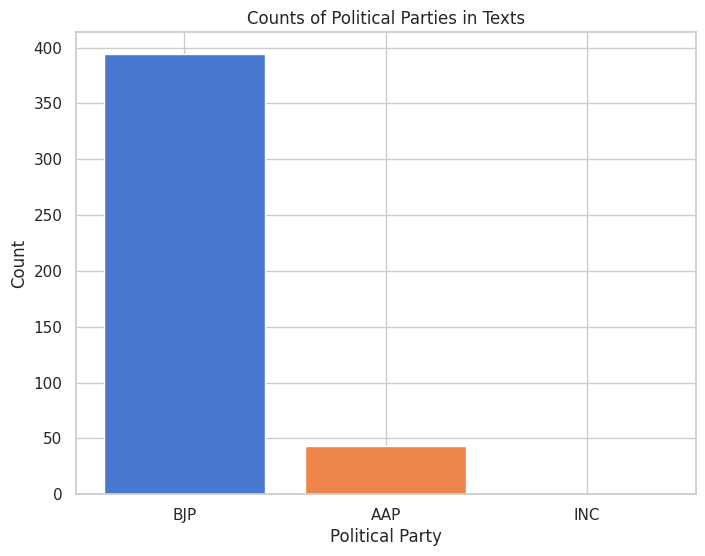

In [ ]:
# Importing Libraries for Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Define Seaborn color palette to use
palette_color = sns.color_palette('muted')

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['BJP', 'AAP', 'INC'], [count_bjp, count_aap, count_inc], color=palette_color)
plt.title('Counts of Political Parties in Texts')
plt.xlabel('Political Party')
plt.ylabel('Count')

Text(0.5, 1.0, 'Pie Chart Showing Source for Tweets')

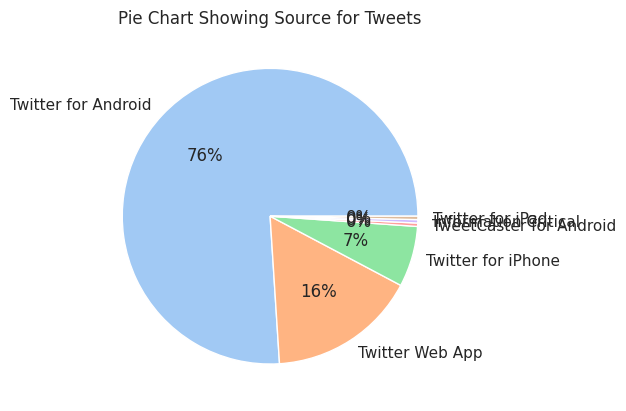

In [ ]:
# Define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# Plotting pie chart for source column
plt.pie(count_data_source,labels = count_data_source.index,colors = palette_color,autopct='%.0f%%')

# Giving title to plot
plt.title("Pie Chart Showing Source for Tweets")

Text(0.5, 1.0, 'Pie Chart Showing Location of Users')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128276 (\N{BELL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128099 (\N{FOOTPRINTS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128690 (\N{BICYCLE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128664 (\N{ONCOMING AUTOMOBILE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128676 (\N{SPEEDBOAT}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10

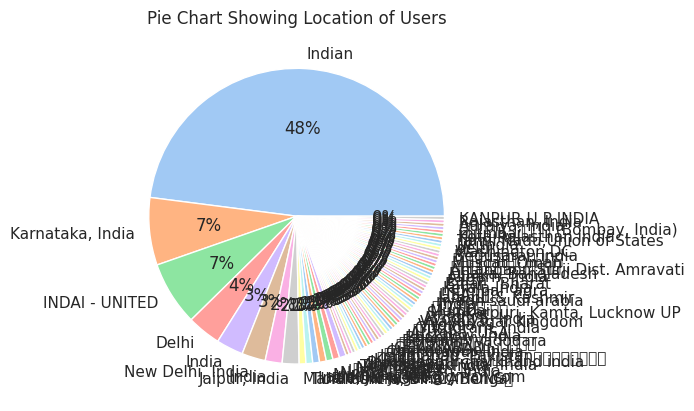

In [ ]:
# Define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# Plotting pie chart for location column
# Since there are many locations this will not represent it clearly
plt.pie(count_data_location,labels = count_data_location.index,colors = palette_color,autopct='%.0f%%')

# Giving title to plot
plt.title("Pie Chart Showing Location of Users")